In [1]:
from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
x, y = iris['data'], iris['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=4)

# StackingClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import StackingClassifier

estimators = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('rf', RandomForestClassifier(n_estimators=5, random_state=42))
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LinearSVC()
)

In [4]:
clf.fit(x_train, y_train)

StackingClassifier(estimators=[('knn', KNeighborsClassifier()),
                               ('rf',
                                RandomForestClassifier(n_estimators=5,
                                                       random_state=42))],
                   final_estimator=LinearSVC())

In [5]:
print("train score:", clf.score(x_train, y_train))
print("test score:", clf.score(x_test, y_test))

train score: 0.9732142857142857
test score: 0.9736842105263158


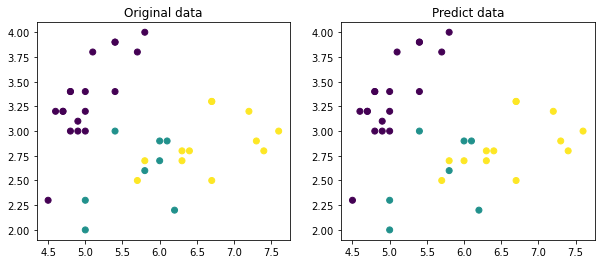

In [6]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.title('Original data')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)

plt.subplot(122)
plt.title('Predict data')
plt.scatter(x_test[:, 0], x_test[:, 1], c=clf.predict(x_test))

plt.show()

# StackingRegressor
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html

In [7]:
x, y = make_regression(n_samples=100, n_features=1, noise=20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=4)

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

estimators = [
    ('knn', KNeighborsRegressor(n_neighbors=5)),
    ('rf', RandomForestRegressor(n_estimators=5, random_state=42))
]

clf_reg = StackingRegressor(
    estimators=estimators, final_estimator=SVR(C=1, kernel='linear')
)

In [9]:
clf_reg.fit(x_train, y_train)

StackingRegressor(estimators=[('knn', KNeighborsRegressor()),
                              ('rf',
                               RandomForestRegressor(n_estimators=5,
                                                     random_state=42))],
                  final_estimator=SVR(C=1, kernel='linear'))

In [10]:
from sklearn.metrics import mean_squared_error

print("train score:", clf_reg.score(x_train, y_train))
print("test score:", clf_reg.score(x_test, y_test))

print("mse:", mean_squared_error(clf_reg.predict(x_test), y_test))

train score: 0.8371078157597778
test score: 0.7697464371418663
mse: 582.7494108035253


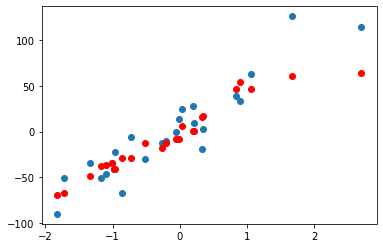

In [11]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, clf_reg.predict(x_test), color="red")